## Preprocessing

In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tensorflow
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns=['EIN', 'NAME'])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [4]:
# Determine the number of unique values in each column.
df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df.APPLICATION_TYPE.value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500
application_types_to_replace = df.APPLICATION_TYPE.value_counts()[df.APPLICATION_TYPE.value_counts() < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df.CLASSIFICATION.value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df.CLASSIFICATION.value_counts()[df.CLASSIFICATION.value_counts() > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_cutoff = 300
classifications_to_replace = df.CLASSIFICATION.value_counts()[df.CLASSIFICATION.value_counts() < class_cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1484
C7000,777


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df, dtype=int)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
X= df2.drop(columns=['IS_SUCCESSFUL'])
y = df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 44) (8575, 44)


In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=99, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model.add(tf.keras.layers.Dense(units=97, activation="relu"))

# Add in a Third layer
nn_model.add(tf.keras.layers.Dense(units=95, activation="relu"))

# Add in a Fourth layer
nn_model.add(tf.keras.layers.Dense(units=93, activation="relu"))

# Add in a Fourth layer
nn_model.add(tf.keras.layers.Dense(units=91, activation="relu"))

# add the output layer that users a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 99)                  │           4,455 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 97)                  │           9,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 95)                  │           9,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 93)                  │           8,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 91)                  │           8,554 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              92 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,039 (160.31 KB)

 Trainable params: 41,039 (160.31 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile the sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

X_train = np.asarray(X_train).astype(np.float32)


In [15]:
# Train the model
# Fit the model in the training data
fit_model = nn_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4934 - loss: 8377.5635
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5165 - loss: 209.0876
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5291 - loss: 0.6916
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5296 - loss: 0.6915
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5332 - loss: 0.6910
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5288 - loss: 0.6916
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5320 - loss: 0.6912
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5391 - loss: 0.6901
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5346 - loss: 0.6909
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5314 - loss: 0.6913
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5372 - loss: 0.6905
Epoch 12/200
804/804 ━━━━━━━━━━━━━━━

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.5322 - loss: 0.6912
Loss: 0.6911985874176025, Accuracy: 0.5322449207305908


In [17]:
# Export our model to HDF5 file
nn_model.save('model.h5')

In [18]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.4999320486427308

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.49946751412815166

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27   

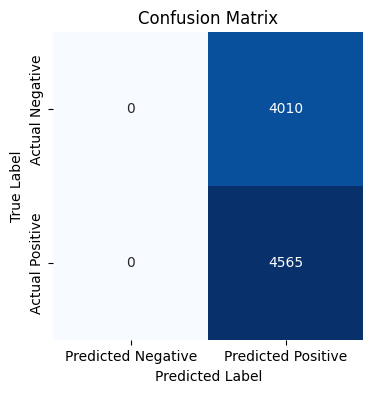

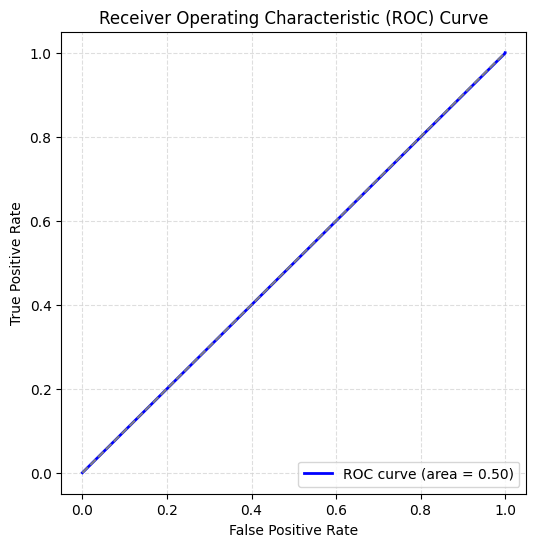

In [19]:
doClassification_NN(nn_model, X_train, X_test, y_train, y_test)

In [20]:
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL']
for col in cols:
    print(col)
    print(df[col].nunique())
    print(df[col].value_counts())

APPLICATION_TYPE
9
APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64
AFFILIATION
6
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64
CLASSIFICATION
7
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64
USE_CASE
5
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64
ORGANIZATION
4
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64
STATUS
2
STATUS
1    34294
0        5
Name: count, dtype: int64
INCOME_AMT
9
INCOME_AMT
0                24388
25000-99999       

In [21]:
df.AFFILIATION.value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Family/Parent,64
National,33
Regional,13
Other,4


In [22]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_cutoff = 1000
classifications_to_replace = df.AFFILIATION.value_counts()[df.AFFILIATION.value_counts() < class_cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['AFFILIATION'] = df['AFFILIATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [23]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
org_cutoff = 1000
classifications_to_replace = df.ORGANIZATION.value_counts()[df.ORGANIZATION.value_counts() < org_cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['ORGANIZATION'] = df['ORGANIZATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
Trust,23515
Association,10255
Other,529


In [34]:
df3 = pd.get_dummies(df, dtype=int)
df3.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [35]:
# Split our preprocessed data into our features and target arrays
X= df3.drop(columns=['IS_SUCCESSFUL'])
y = df3.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 40) (8575, 40)


In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()

# Add our first dense layer, including the input layer
nn_model2.add(tf.keras.layers.Dense(units=99, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model2.add(tf.keras.layers.Dense(units=97, activation="tanh"))

# Add in a Third layer
nn_model2.add(tf.keras.layers.Dense(units=95, activation="tanh"))

# Add in a Fourth layer
nn_model2.add(tf.keras.layers.Dense(units=93, activation="tanh"))

# Add in a Fourth layer
nn_model2.add(tf.keras.layers.Dense(units=91, activation="relu"))

# add the output layer that users a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 99)                  │           4,059 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 97)                  │           9,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 95)                  │           9,310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 93)                  │           8,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 91)                  │           8,554 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              92 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,643 (158.76 KB)

 Trainable params: 40,643 (158.76 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# compile the sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

X_train = np.asarray(X_train).astype(np.float32)


In [41]:
# Train the model
# Fit the model in the training data
fit_model = nn_model2.fit(X_train, y_train, epochs=200)

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5102 - loss: 0.6977
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5196 - loss: 0.6931
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5291 - loss: 0.6925
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5263 - loss: 0.6924
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5307 - loss: 0.6919
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5331 - loss: 0.6912
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5322 - loss: 0.6912
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5349 - loss: 0.6909
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5339 - loss: 0.6910
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5350 - loss: 0.6910
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5277 - loss: 0.6927
Epoch 12/200
804/804 ━━━━━━━━━━━━━━━━━━━━

In [42]:
nn_model.save('model2.h5')

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27      0.50      0.35      8575
wei

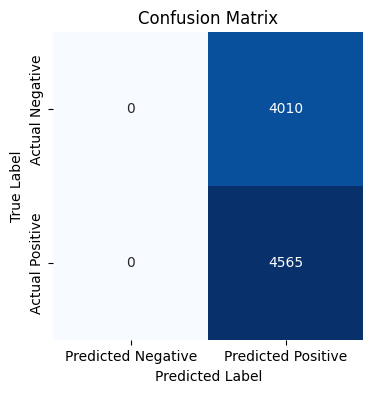

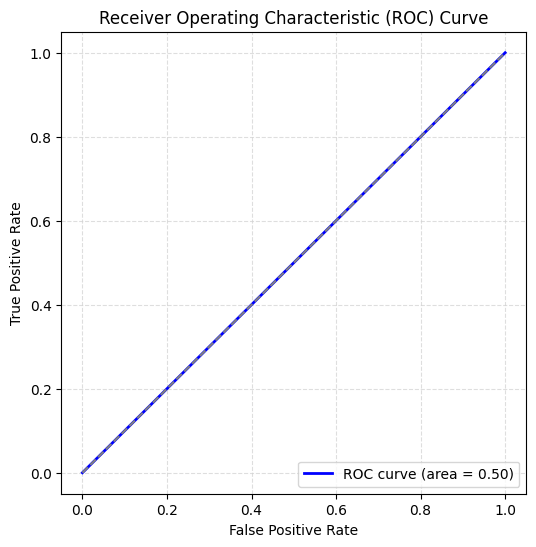

In [43]:
doClassification_NN(nn_model2, X_train, X_test, y_train, y_test)

In [44]:
df4 = df3.copy()

In [50]:
# Split our preprocessed data into our features and target arrays
X= df4.drop(columns=['IS_SUCCESSFUL'])
y = df4.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 40) (8575, 40)


In [51]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Create the Keras Sequential model
nn_model3 = tf.keras.models.Sequential()

# Add our first dense layer, including the input layer
nn_model3.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model3.add(tf.keras.layers.Dense(units=175, activation="tanh"))

# Add in a Third layer
nn_model3.add(tf.keras.layers.Dense(units=150, activation="relu"))

# Add in a Fourth layer
nn_model3.add(tf.keras.layers.Dense(units=125, activation="elu"))

# Add in a Fourth layer
nn_model3.add(tf.keras.layers.Dense(units=100, activation="elu"))

# add the output layer that users a probability activation function
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 200)                 │           8,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 175)                 │          35,175 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 150)                 │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 125)                 │          18,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,351 (395.90 KB)

 Trainable params: 101,351 (395.90 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# compile the sequential model together and customize metrics
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

X_train = np.asarray(X_train).astype(np.float32)

In [57]:
# Train the model
# Fit the model in the training data
fit_model = nn_model3.fit(X_train, y_train, epochs=350)

Epoch 1/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5224 - loss: 0.7038
Epoch 2/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5328 - loss: 0.6914
Epoch 3/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5314 - loss: 0.6917
Epoch 4/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5322 - loss: 0.6916
Epoch 5/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5340 - loss: 0.6911
Epoch 6/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5308 - loss: 0.6913
Epoch 7/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5319 - loss: 0.6914
Epoch 8/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5343 - loss: 0.6909
Epoch 9/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5325 - loss: 0.6912
Epoch 10/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5315 - loss: 0.6914
Epoch 11/350
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5347 - loss: 0.6909
Epoch 12/350
804/804 ━━━━━━━━━━━━━━━━━━━━

In [58]:
nn_model.save('model3.h5')

804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.5000679513572692

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5005324858718483

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27    

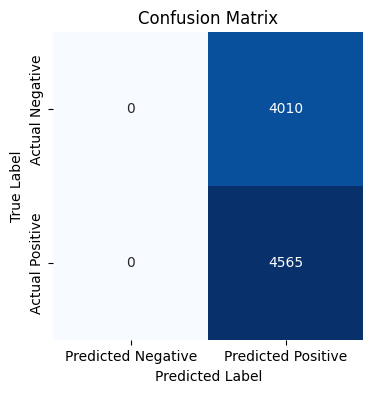

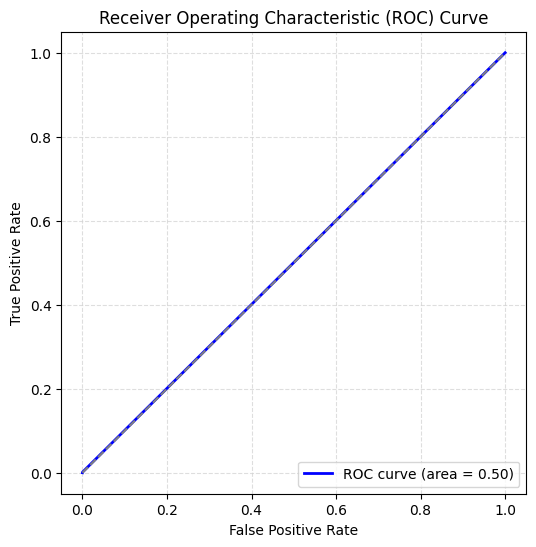

In [60]:
doClassification_NN(nn_model3, X_train, X_test, y_train, y_test)

In [63]:
# Create the Keras Sequential model
nn_model4 = tf.keras.models.Sequential()

# Add our first dense layer, including the input layer
nn_model4.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model4.add(tf.keras.layers.Dense(units=175, activation="tanh"))

# Add in a Third layer
nn_model4.add(tf.keras.layers.Dense(units=150, activation="relu"))

# Add in a Fourth layer
nn_model4.add(tf.keras.layers.Dense(units=125, activation="elu"))

# Add in a fifth layer
nn_model4.add(tf.keras.layers.Dense(units=100, activation="elu"))

# Add in a sixth layer
nn_model4.add(tf.keras.layers.Dense(units=75, activation="tanh"))

# Add in a seventh layer
nn_model4.add(tf.keras.layers.Dense(units=50, activation="tanh"))

# add the output layer that users a probability activation function
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 200)                 │           8,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 175)                 │          35,175 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 150)                 │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 125)                 │          18,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,676 (440.14 KB)

 Trainable params: 112,676 (440.14 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# compile the sequential model together and customize metrics
nn_model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

X_train = np.asarray(X_train).astype(np.float32)

In [65]:
# Train the model
# Fit the model in the training data
fit_model = nn_model4.fit(X_train, y_train, epochs=300)

Epoch 1/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.5082 - loss: 0.6989
Epoch 2/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5172 - loss: 0.6930
Epoch 3/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5211 - loss: 0.6927
Epoch 4/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5254 - loss: 0.6921
Epoch 5/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5336 - loss: 0.6917
Epoch 6/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5248 - loss: 0.6922
Epoch 7/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5242 - loss: 0.6923
Epoch 8/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5190 - loss: 0.6928
Epoch 9/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5241 - loss: 0.6926
Epoch 10/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5300 - loss: 0.6916
Epoch 11/300
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5346 - loss: 0.6918
Epoch 12/300
804/804 ━━━━━━━━━━━━━━━━━━━

In [66]:
nn_model.save('model4.h5')

804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
TRAIN METRICS
    Confusion Matrix:
    [[    0 12028]
 [    0 13696]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     12028
           1       0.53      1.00      0.69     13696

    accuracy                           0.53     25724
   macro avg       0.27      0.50      0.35     25724
weighted avg       0.28      0.53      0.37     25724

    
TEST METRICS
    Confusion Matrix:
    [[   0 4010]
 [   0 4565]]

    AUC: 0.5

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4010
           1       0.53      1.00      0.69      4565

    accuracy                           0.53      8575
   macro avg       0.27      0.50      0.35      8575
wei

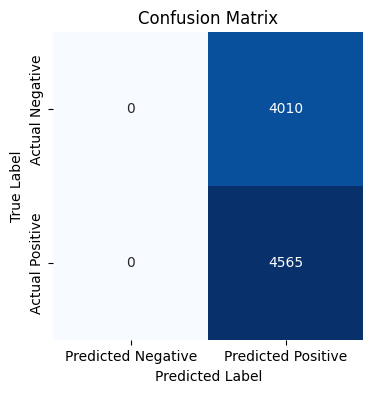

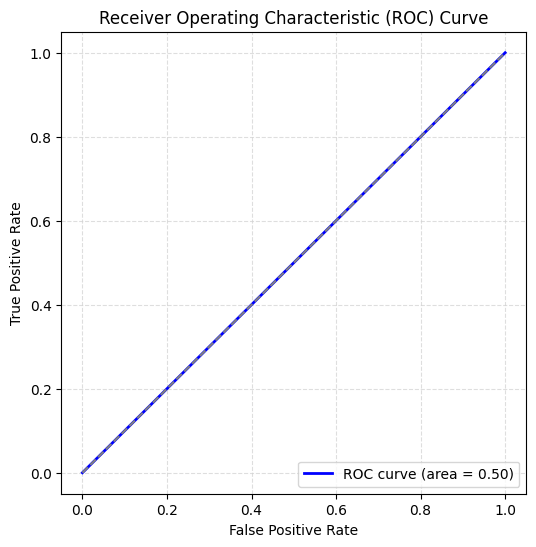

In [67]:
doClassification_NN(nn_model4, X_train, X_test, y_train, y_test)